# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla Q(w) = 2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [29]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression


In [31]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [32]:
from descents import LossFunction

In [33]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        #'loss_function': LossFunction.LogCosh
        
    }
}


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)
  

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [34]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
    
)

regression.fit(x, y)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55224694/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55135095/



* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55135271/



* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55170424/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55242613/

In [35]:
import numpy as np
from scipy.sparse import csr_matrix

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

IndentationError: expected an indented block (descents.py, line 82)

In [37]:
data = pd.read_csv('autos.csv')

In [38]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [39]:
data.shape

(241190, 10)

In [40]:
data[data.price < 17].price.value_counts()

1     274
10      5
9       4
2       4
5       3
3       2
15      1
13      1
11      1
Name: price, dtype: int64

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

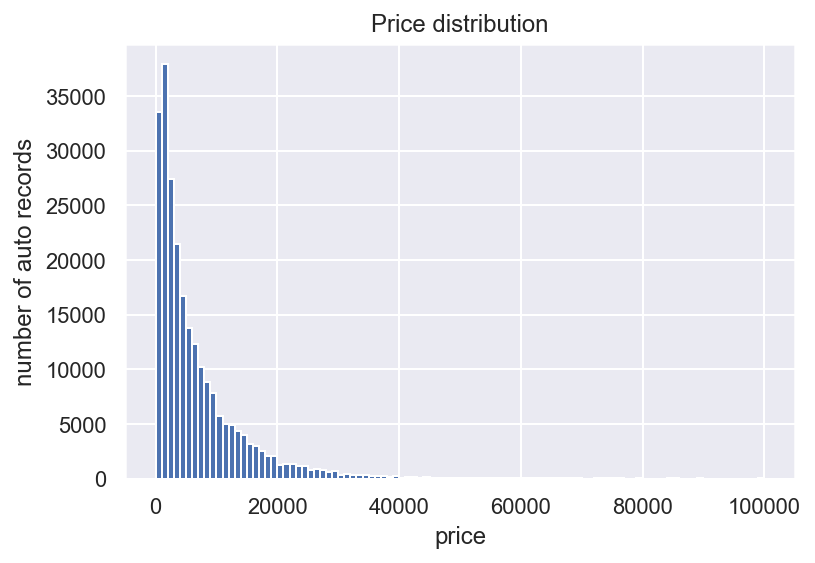

In [41]:
%config InlineBackend.figure_format = 'retina'
plt.hist(data.price, bins=100)
plt.xlabel('price')
plt.rcParams['figure.figsize'] = 8, 5
plt.ylabel('number of auto records')
plt.title('Price distribution')
plt.show()

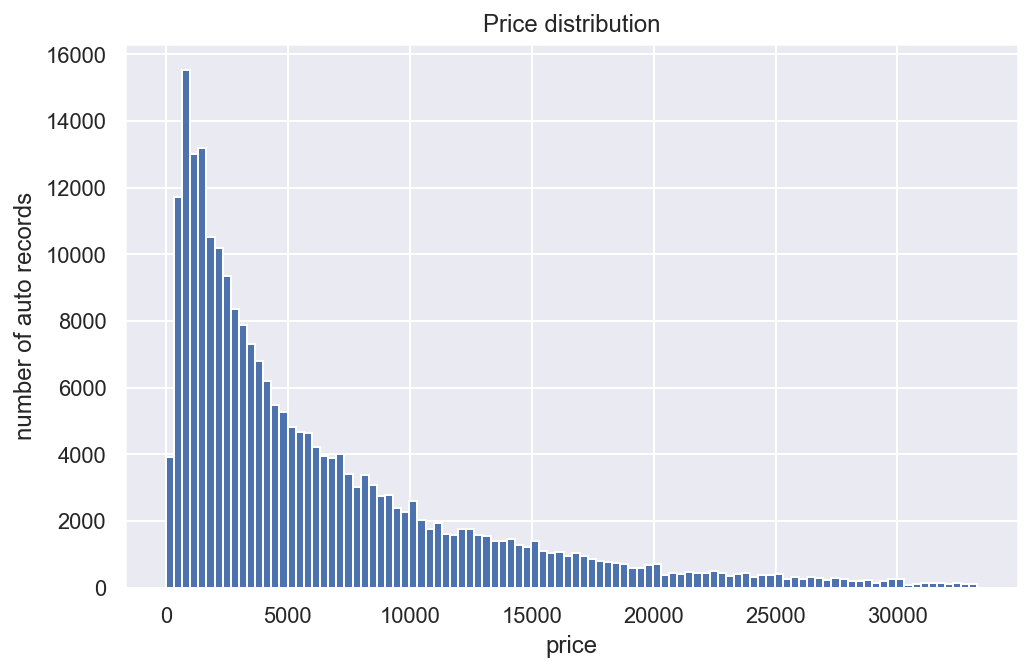

In [42]:
%config InlineBackend.figure_format = 'retina'
plt.hist(data.price, bins=100, range=(np.quantile(data.price, 0.00), np.quantile(data.price, 0.985)))
plt.xlabel('price')
plt.rcParams['figure.figsize'] = 8, 5
plt.ylabel('number of auto records')
plt.title('Price distribution')
plt.show()

In [43]:
data = data.drop(data[data.price > np.quantile(data.price, 0.985)].index)

In [44]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [45]:
data.head(5)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [46]:
data.model.nunique()

248

Text(0.5, 1, 'Зависимость цены автомобиля от пробега')

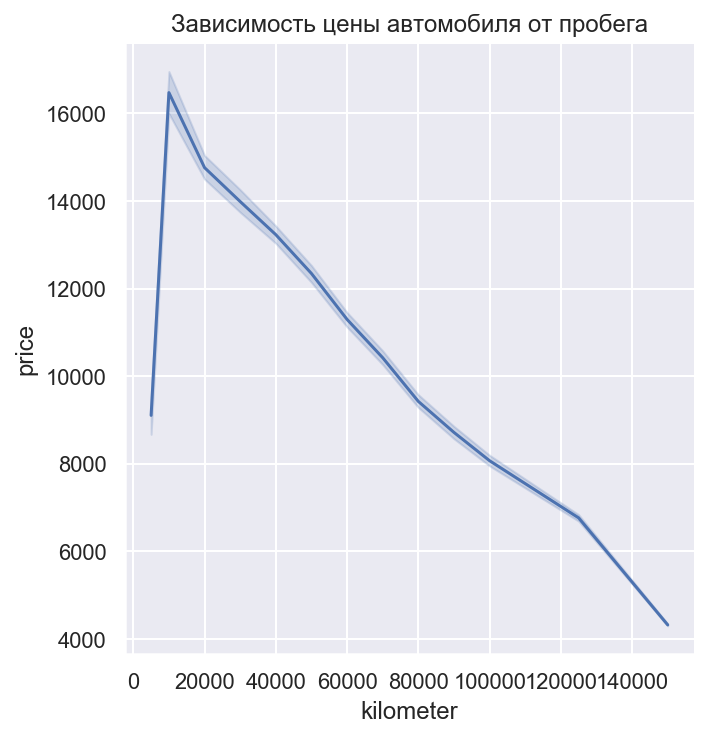

In [47]:
sns.relplot(data=data, x ='kilometer', y = 'price' ,kind='line')
plt.title('Зависимость цены автомобиля от пробега')

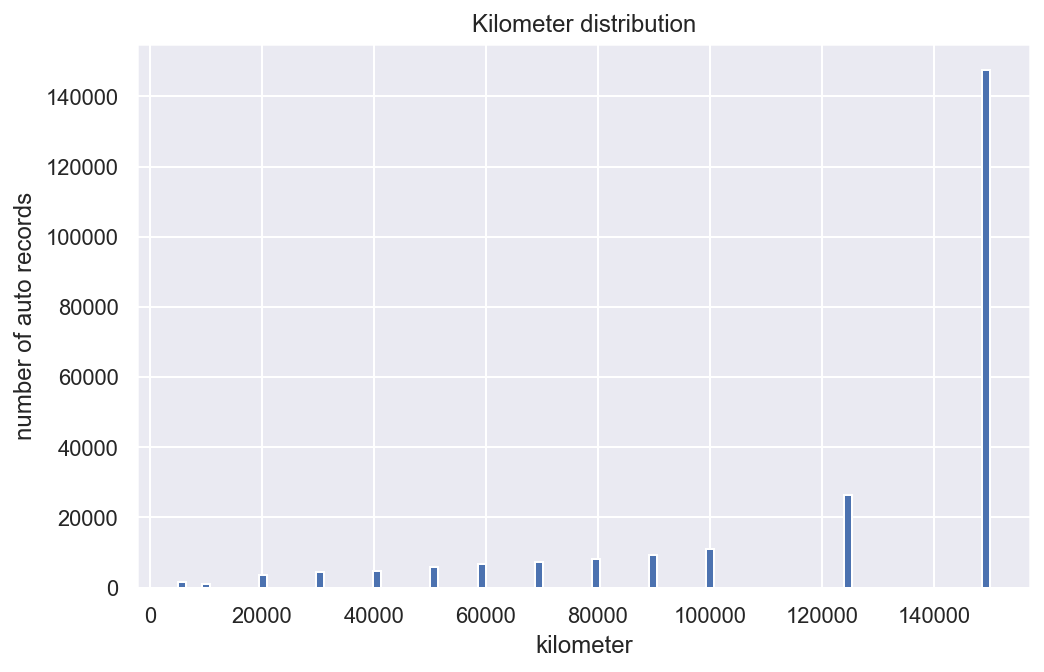

In [48]:
%config InlineBackend.figure_format = 'retina'
plt.hist(data.kilometer, bins=100)
plt.xlabel('kilometer')
plt.rcParams['figure.figsize'] = 8, 5
plt.ylabel('number of auto records')
plt.title('Kilometer distribution')
plt.show()

Text(0.5, 1, 'Зависимость цены  автомобиля от мощности')

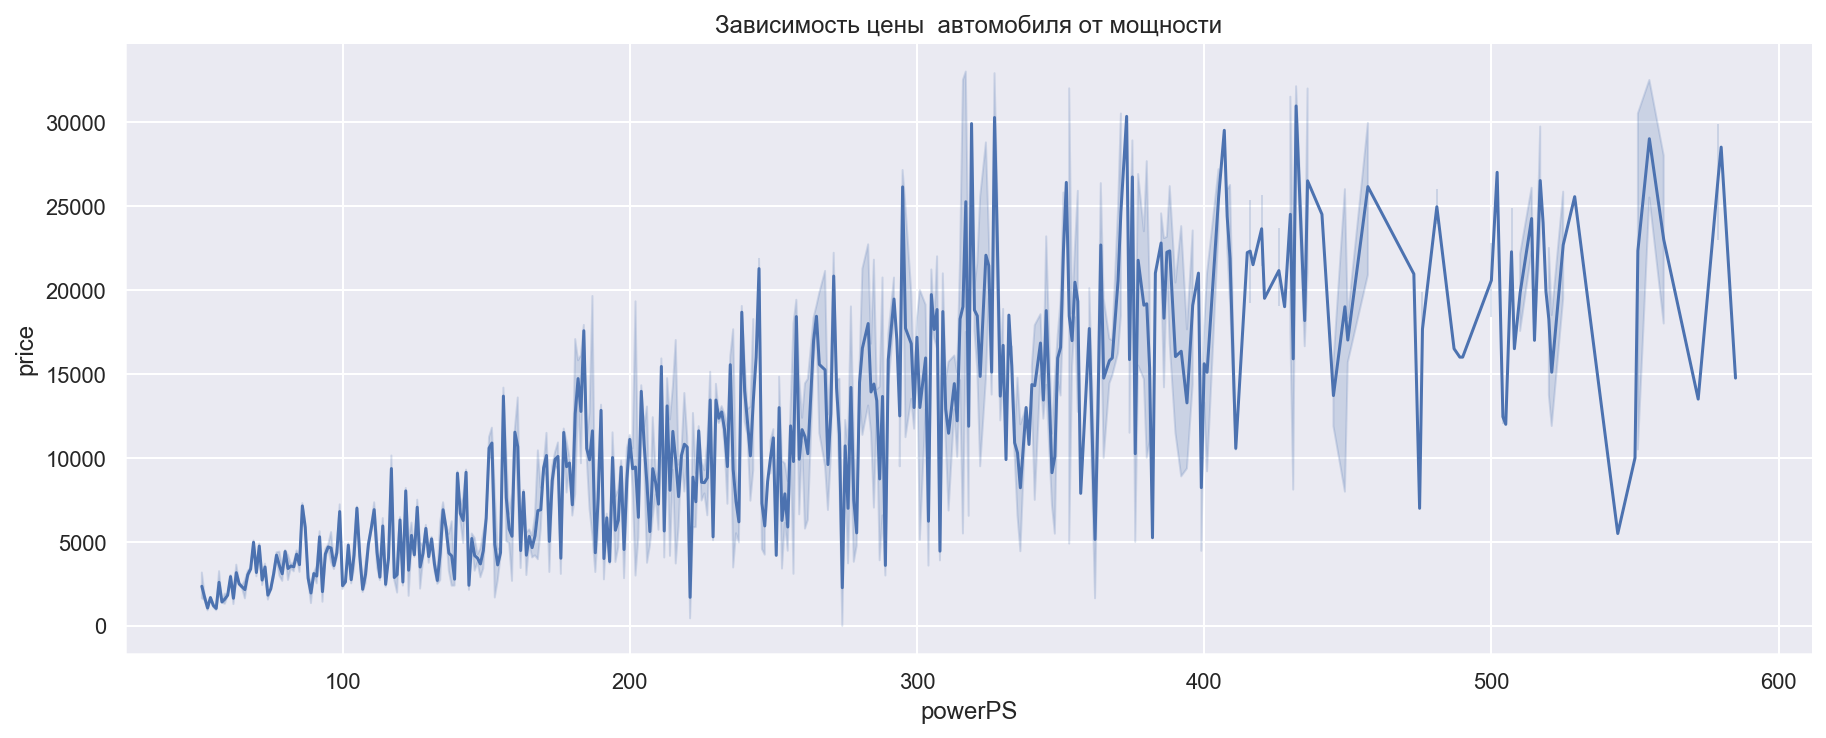

In [49]:
g = sns.relplot(data=data, x ='powerPS', y = 'price' ,kind='line')
g.figure.set_size_inches(15, 5)
plt.title('Зависимость цены  автомобиля от мощности')

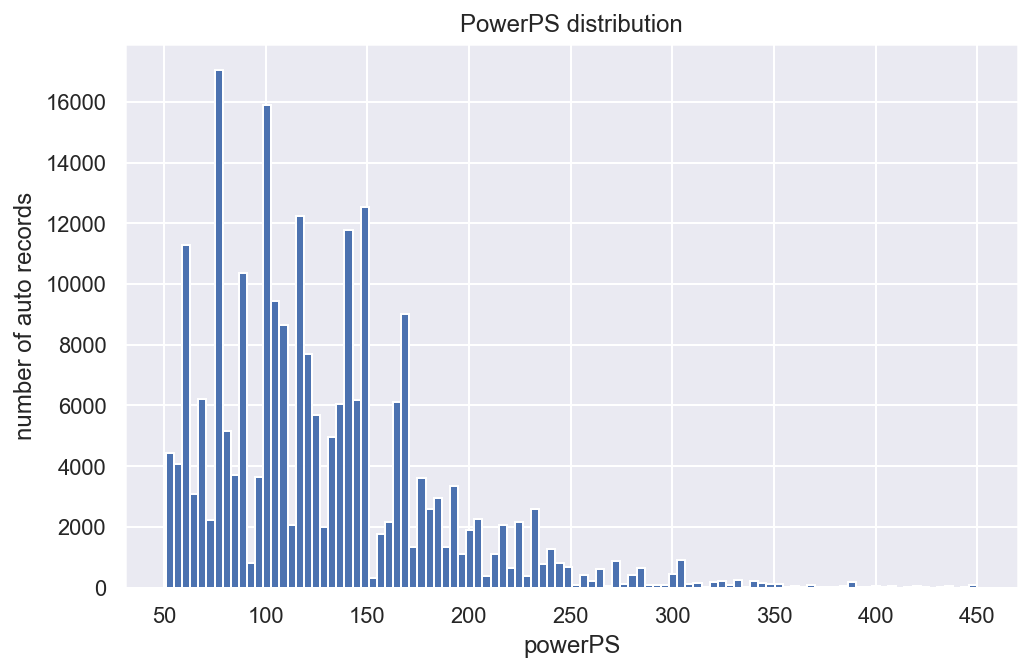

In [50]:
%config InlineBackend.figure_format = 'retina'
plt.hist(data.powerPS, bins=100, range=(np.quantile(data.powerPS, 0.00), np.quantile(data.powerPS, 0.999)))
plt.xlabel('powerPS')
plt.rcParams['figure.figsize'] = 8, 5
plt.ylabel('number of auto records')
plt.title('PowerPS distribution')
plt.show()

Text(0.5, 1, 'Зависимость цены автомобиля от возраста в месяцах')

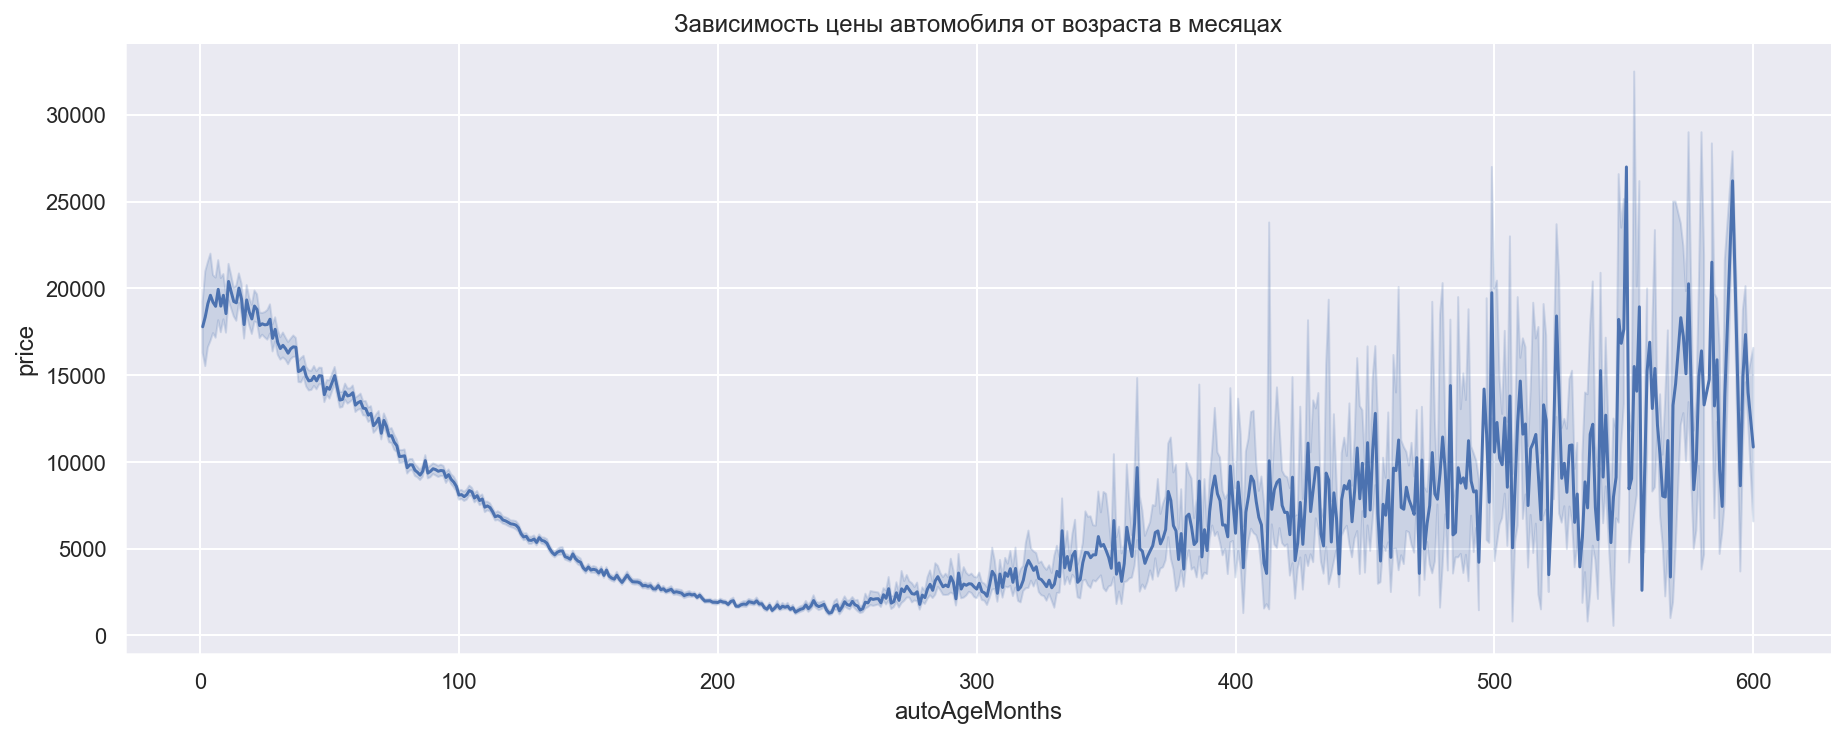

In [51]:
g = sns.relplot(data=data, x ='autoAgeMonths', y = 'price' ,kind='line')
g.figure.set_size_inches(15, 5)
plt.title('Зависимость цены автомобиля от возраста в месяцах')

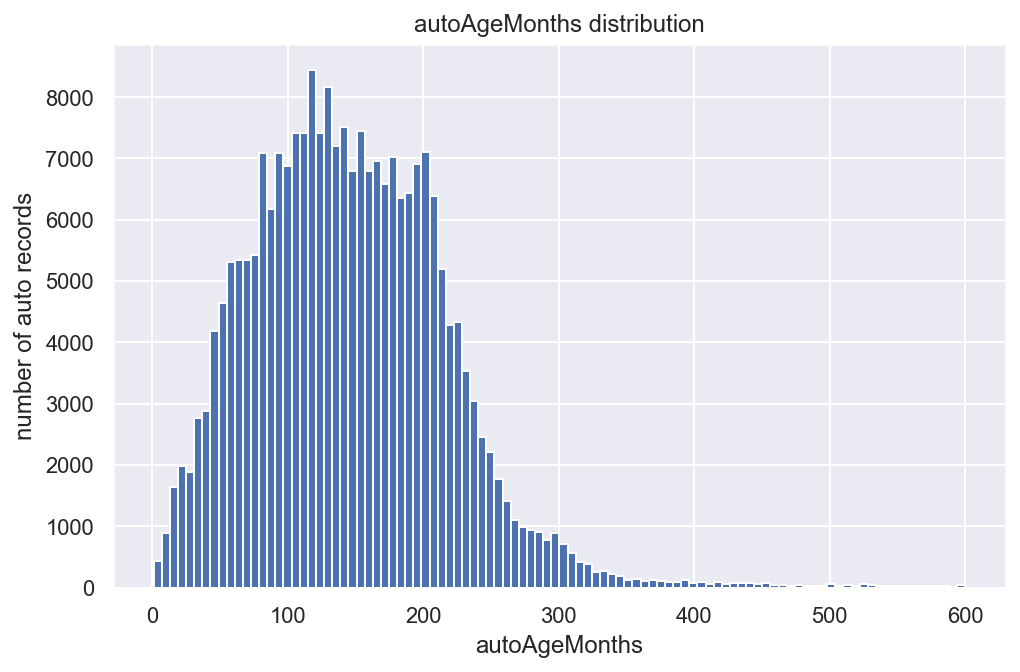

In [52]:
%config InlineBackend.figure_format = 'retina'
plt.hist(data.autoAgeMonths, bins=100, range=(np.quantile(data.autoAgeMonths, 0.00), np.quantile(data.autoAgeMonths, 1)))
plt.xlabel('autoAgeMonths')
plt.rcParams['figure.figsize'] = 8, 5
plt.ylabel('number of auto records')
plt.title('autoAgeMonths distribution')
plt.show()

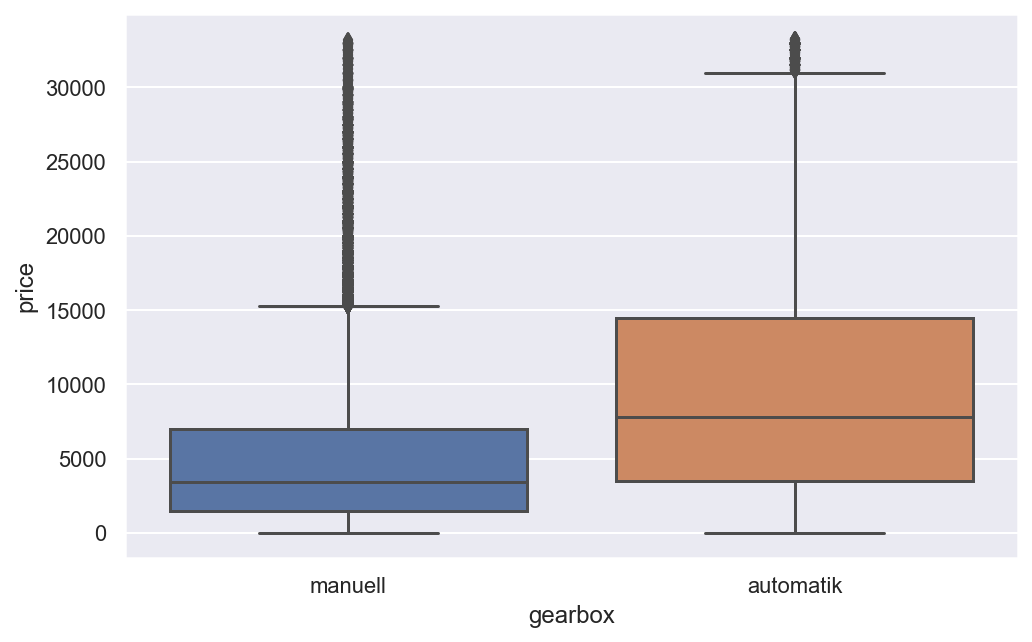

In [53]:
ax = sns.boxplot(x="gearbox", y="price", data=data)

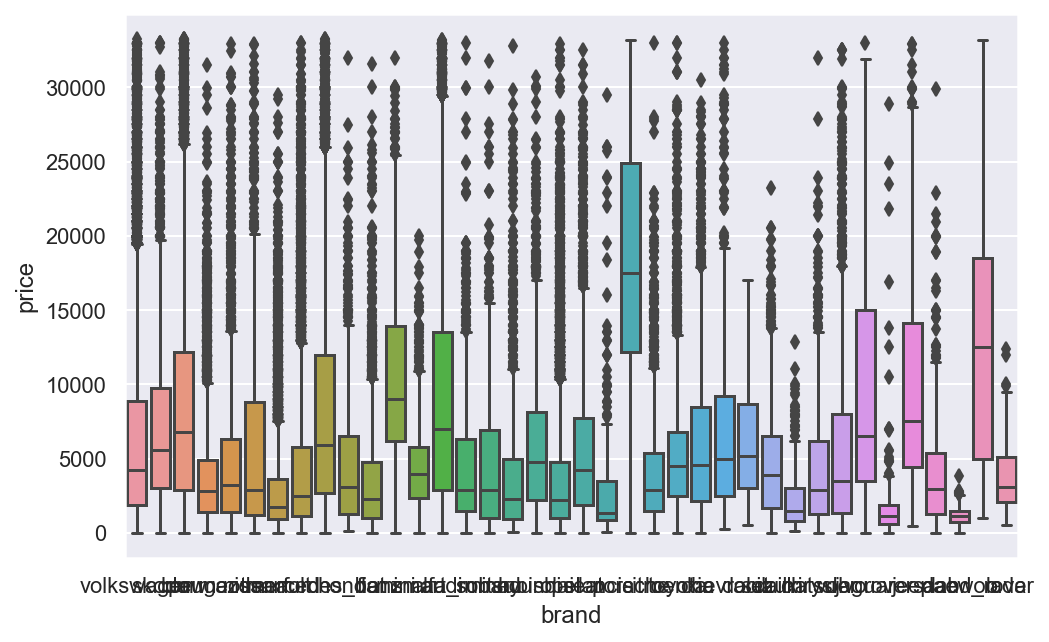

In [54]:
ax = sns.boxplot(x="brand", y="price", data=data)


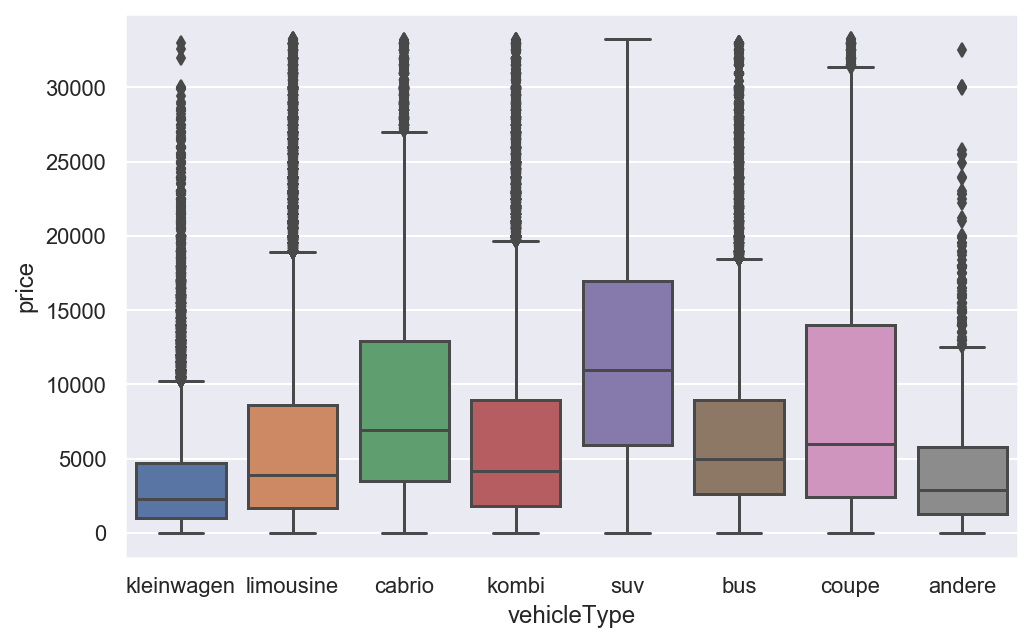

In [55]:
ax = sns.boxplot(x="vehicleType", y="price", data=data)

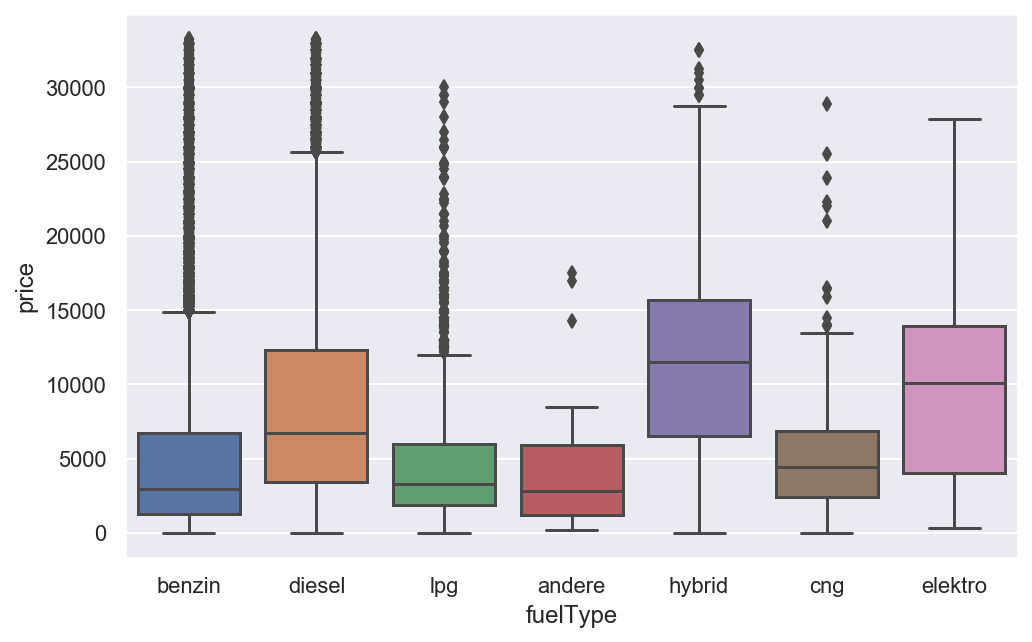

In [56]:
ax = sns.boxplot(x="fuelType", y="price", data=data)

In [57]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [58]:
data.notRepairedDamage.value_counts()

nein    214036
ja       23536
Name: notRepairedDamage, dtype: int64

In [59]:
data.notRepairedDamage = data.notRepairedDamage.replace({'nein': 0, 'ja': 1})

In [60]:
data['log_price'] = np.log1p(data['price'].values)

In [61]:
data = data.drop('price', axis = 1)

In [62]:
data.dtypes


brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage      int64
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

In [63]:
categorical = []
numeric = []
other = []

# YOUR CODE (EDA): что такое еда
categorical = list(data.dtypes[data.dtypes == "object"].index)
numeric = list(data.dtypes[data.dtypes == "int"].drop([ 'notRepairedDamage']).index)
other = ['notRepairedDamage']

In [64]:
categorical

['brand', 'model', 'vehicleType', 'gearbox', 'fuelType']

In [65]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]

y = data['log_price']

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [67]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

(190057, 308)
(47515, 308)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

**Вот тут что-то адекватное и красивое**

In [68]:
X_train= X_train.toarray()
X_val= X_val.toarray()
X_test= X_test.toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


In [69]:
def search_lambda(descent_name):
    min_loss = 0
    lambda_opt = None 
    for lambda_ in np.logspace(-2, 1, 20):
   
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'lambda_': lambda_
                
            }
        }

        regression = LinearRegression(
        descent_config=descent_config
        ) 
        regression.fit(X_val, y_val)
        if min_loss == 0:
            min_loss = regression.loss_history[-1]
            lambda_opt = lambda_
        elif min_loss > regression.loss_history[-1]:
                min_loss = regression.loss_history[-1]
                lambda_opt = lambda_
    return lambda_opt, min_loss

In [70]:
lambda_full = search_lambda('full')[0]
lambda_momentum = search_lambda('momentum')[0]
lambda_adam = search_lambda('adam')[0]
lambda_stochastic = search_lambda('stochastic')[0]

In [71]:
lambda_full

2.3357214690901213

In [72]:
lambda_adam

1.623776739188721

In [73]:
lambda_stochastic


0.7847599703514611

In [74]:
lambda_momentum

1.1288378916846884

In [75]:
def calculating_metrics(descent_name, lambda_):
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': x.shape[1],
                'lambda_': lambda_
            }
        }

    regression = LinearRegression(
    descent_config=descent_config
    )
    
    regression.fit(X_train, y_train)
    train_mse = regression.descent.calc_loss(X_train, y_train)
    test_mse = regression.descent.calc_loss(X_test, y_test)
    train_R_squared = 1 - train_mse/np.std(y_train)**2
    test_R_squared = 1 - test_mse/np.std(y_test)**2
    return train_mse, test_mse, train_R_squared, test_R_squared, len(regression.loss_history)

In [76]:
calculating_metrics('full', lambda_full)

(0.37319958016425325,
 0.36351390347666285,
 0.7029185244785938,
 0.7095132186166642,
 86)

In [77]:
calculating_metrics('stochastic', lambda_stochastic)

(0.395761255844915,
 0.38710274617713875,
 0.6849585474108371,
 0.6906631913492506,
 301)

In [78]:
calculating_metrics('adam', lambda_adam)

(0.319842612570636,
 0.3122517945115489,
 0.7453927594578591,
 0.7504771677195181,
 234)

In [79]:
calculating_metrics('momentum', lambda_adam)

(0.43542982331511176,
 0.42565071937597965,
 0.6533808147920603,
 0.6598592068075664,
 123)

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [81]:
def regression_with_lambda_opt(descent_name, lambda_):
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_
            }
        }

    regression = LinearRegression(
    descent_config=descent_config
    )
    regression.fit(X_train, y_train)
    return regression

In [82]:
lh_full = regression_with_lambda_opt('full', lambda_full).loss_history
lh_stochastic = regression_with_lambda_opt('stochastic', lambda_stochastic).loss_history
lh_momentum = regression_with_lambda_opt('momentum', lambda_momentum).loss_history
lh_adam = regression_with_lambda_opt('adam', lambda_adam).loss_history

In [83]:
import matplotlib.pyplot as plt

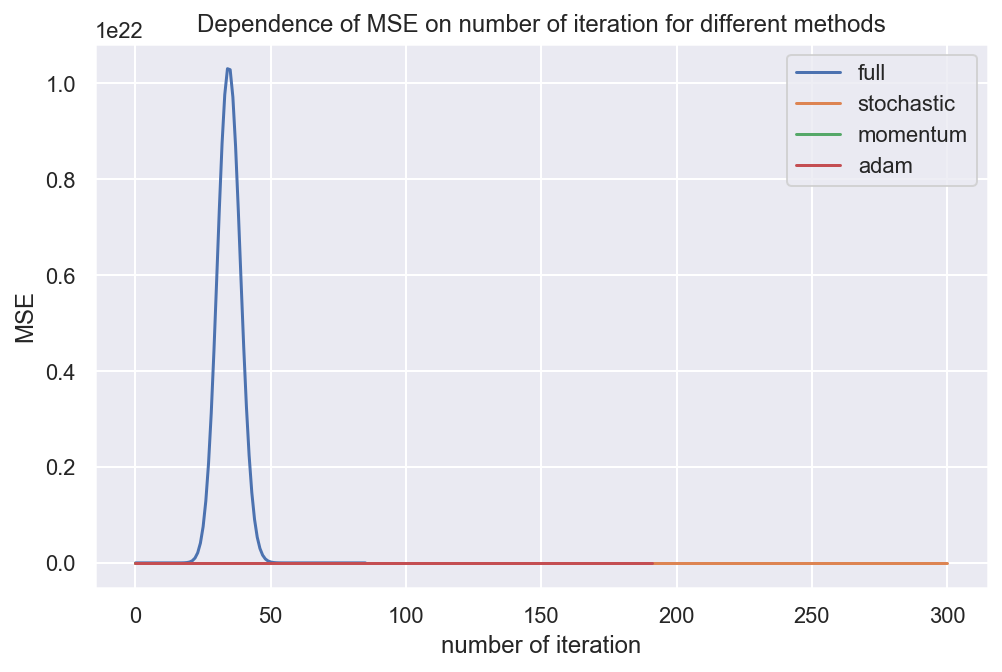

In [84]:
x1 = range(0, len(lh_full))
y1 = lh_full
x2 = range(0, len(lh_stochastic))
y2 = lh_stochastic
x3 = range(0, len(lh_momentum))
y3 = lh_momentum
x4 = range(0, len(lh_adam))
y4 = lh_adam
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.xlabel('number of iteration')
plt.ylabel('MSE')
plt.title('Dependence of MSE on number of iteration for different methods')
plt.legend(['full', 'stochastic', 'momentum', 'adam'])

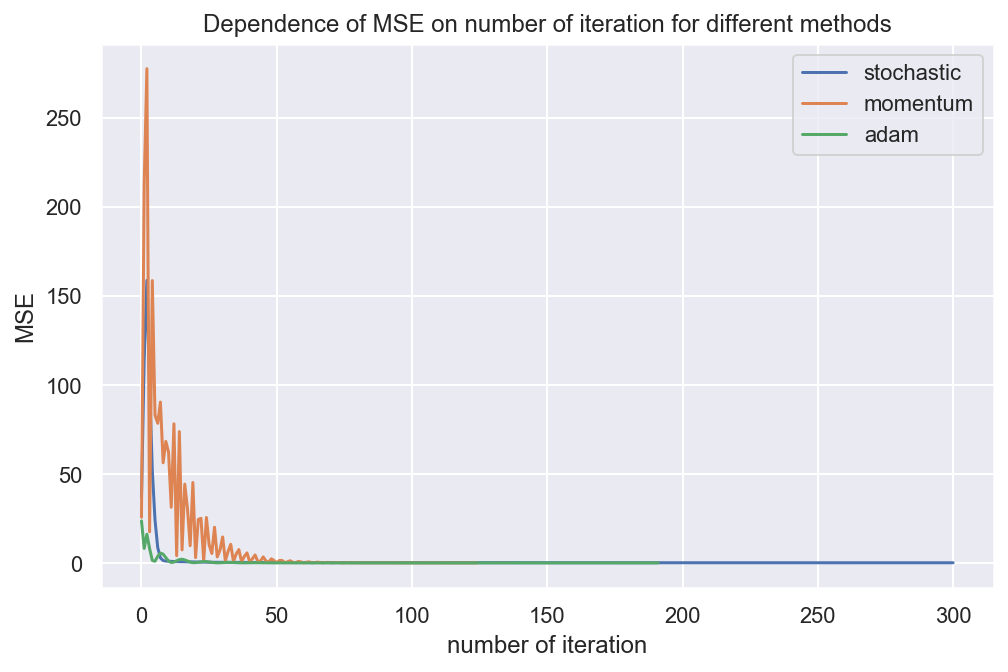

In [85]:
#без full
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.xlabel('number of iteration')
plt.ylabel('MSE')
plt.title('Dependence of MSE on number of iteration for different methods')
plt.legend(['stochastic', 'momentum', 'adam'])

In [86]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [93]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
list_mean_time = []
list_mean_iter = []
for batch_size in batch_sizes:
    mean_time = 0
    mean_iter = 0
    for i in range (0,10):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_stochastic,
                'batch_size': batch_size
            }
        }

        regression = LinearRegression(
        descent_config=descent_config
        )
        start = timer()
        
        regression.fit(X_train, y_train)
        end = timer()
        func_time = end - start
        iteration = len(regression.loss_history)
        mean_time += func_time
        mean_iter += iteration
    print('следущий batch_size пошел')
    mean_time /= 10 
    mean_iter /= 10
    list_mean_time.append(mean_time)
    list_mean_iter.append(mean_iter)

следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий batch_size пошел
следущий bat

Text(0.5, 1.0, 'Dependence of mean time  before convergence on batch size')

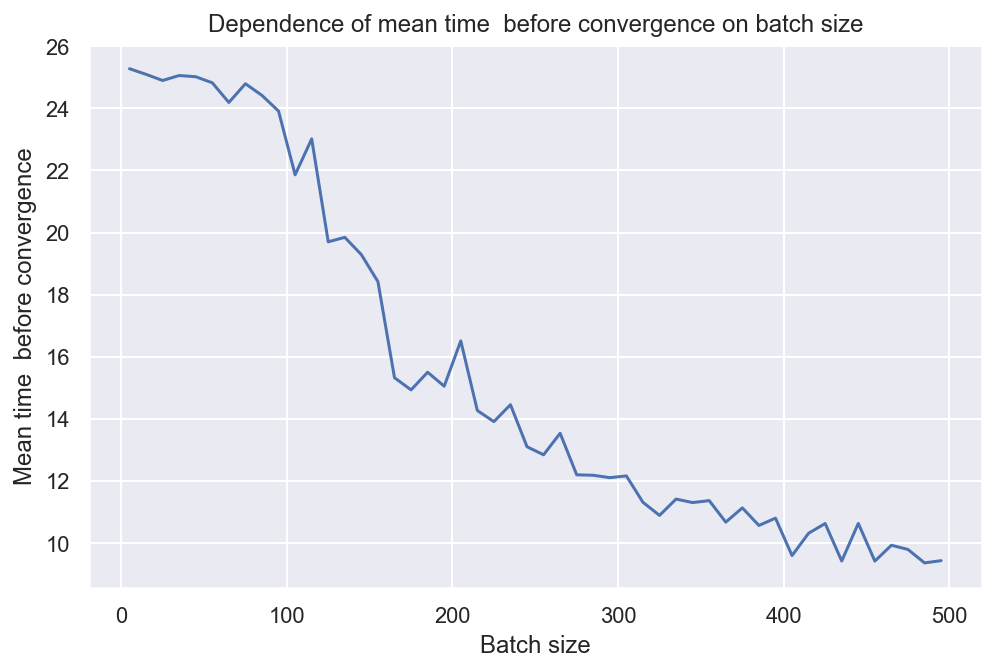

In [99]:
x1 = range(5, 500, 10)
y1 = list_mean_time
plt.plot(x1, y1)

plt.xlabel('Batch size')
plt.ylabel('Mean time  before convergence')
plt.title('Dependence of mean time  before convergence on batch size')


Text(0.5, 1.0, 'Dependence of iteration number on batch size')

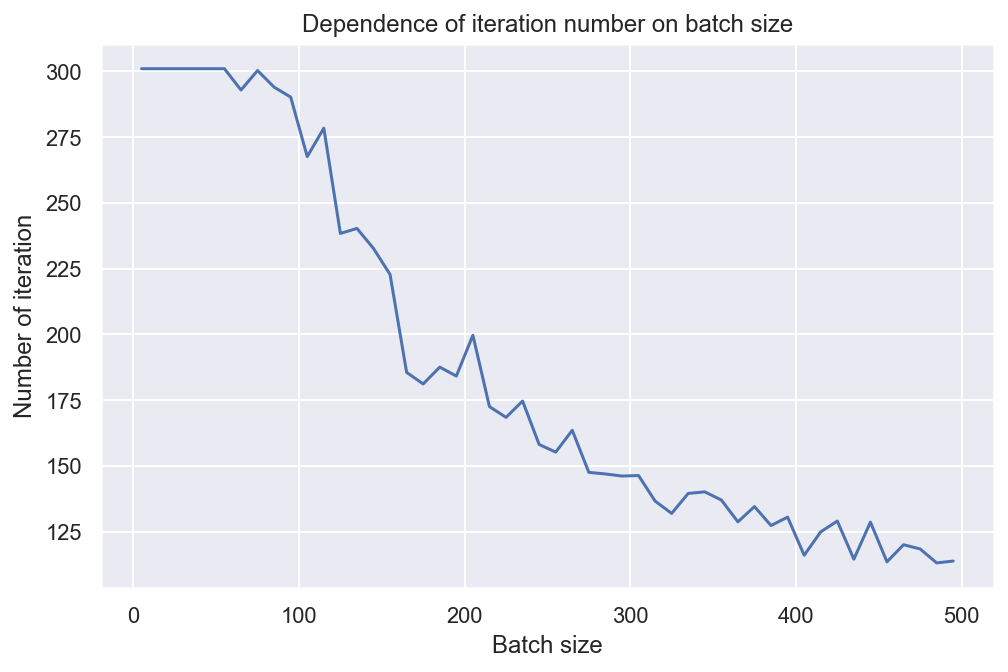

In [101]:
x1 = range(5, 500, 10)
y1 = list_mean_iter
plt.plot(x1, y1)

plt.xlabel('Batch size')
plt.ylabel('Number of iteration')
plt.title('Dependence of iteration number on batch size')


Чем больше батч, тем меньше время и количество итераций до сходимости. Чем больше батч, тем больше вероятность, что градиент по объектам батча сонаправлен с градиентом по всем объектам, поэтому он быстрее сходится и по количеству итераций, и по времени

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55255008/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
alphas = np.logspace(-2, 3, 20)

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
# YOUR CODE:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        #'loss_function': LossFunction.LogCosh
        
    }
}


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)
  

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

Сходили в Зарядье. Вроде как я запомнила, как всех зовут, но это не точно. Было не так неловко, как я предполагала. Все очень милые, особенно прелестная дама в берете.

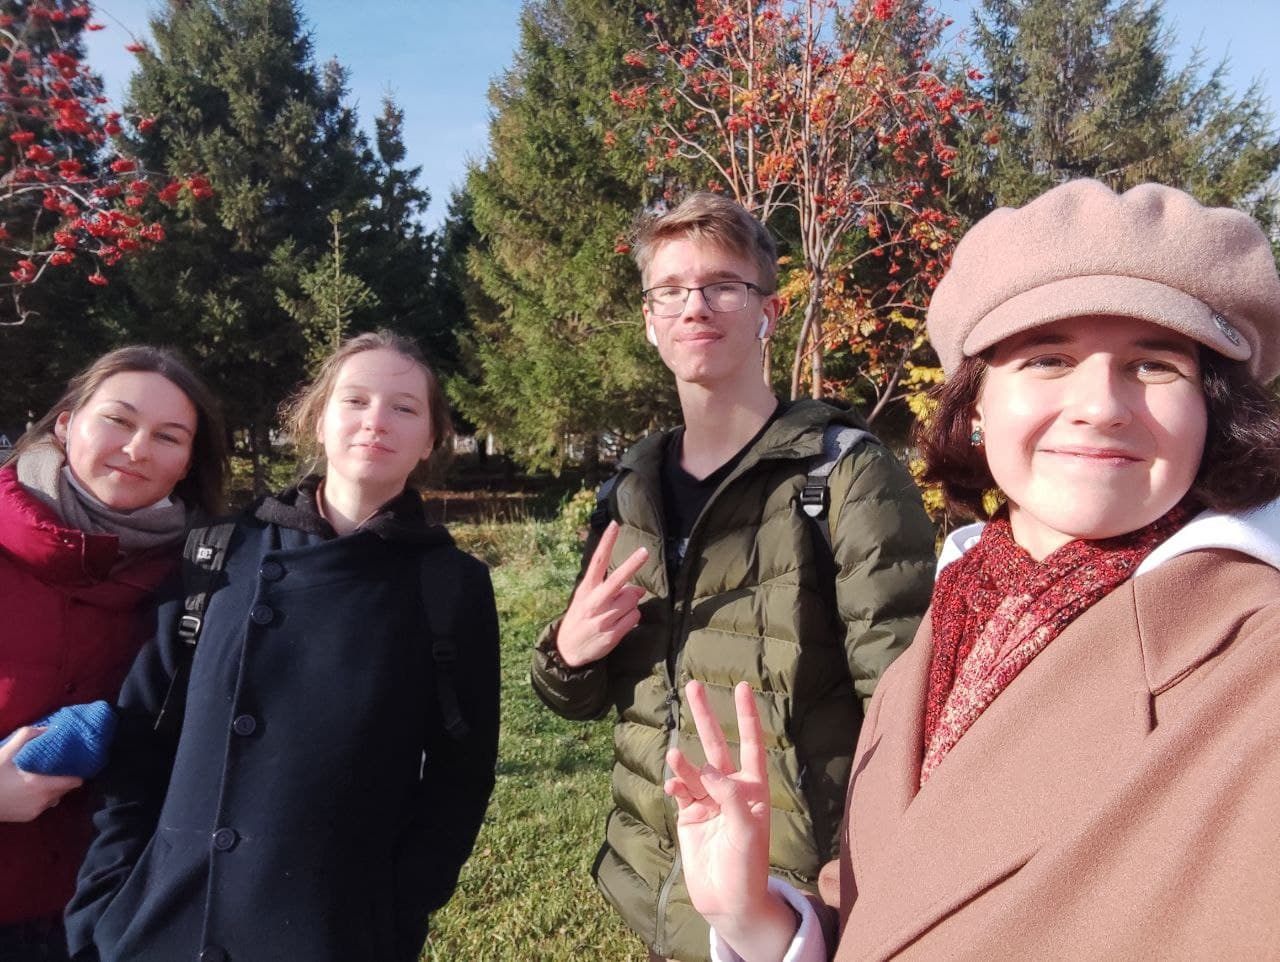

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: